In [15]:
import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [16]:
trials_data= pd.read_csv('trials_training_data.csv')

In [17]:
trials_data.columns

Index(['Name', 'State', 'Notes', 'User', 'Tags', 'Created', 'Runtime', 'Sweep',
       'base_lr', 'epochs', 'loss', 'loss_weights', 'max_lr', 'mode',
       'optimizer', 'optuna_trial', 'scheduler', 'RhiresD/train',
       'RhiresD/val', 'TabsD/train', 'TabsD/val', 'TmaxD/train', 'TmaxD/val',
       'TminD/train', 'TminD/val', 'best_val_loss',
       'best_val_loss_per_channel', 'epoch', 'epoch_time', 'loss/train',
       'loss/val', 'lr', 'precip_val_loss', 'temp_val_loss', 'tmax_val_loss',
       'tmin_val_loss', 'total_val_loss', 'trial', 'weights'],
      dtype='object')

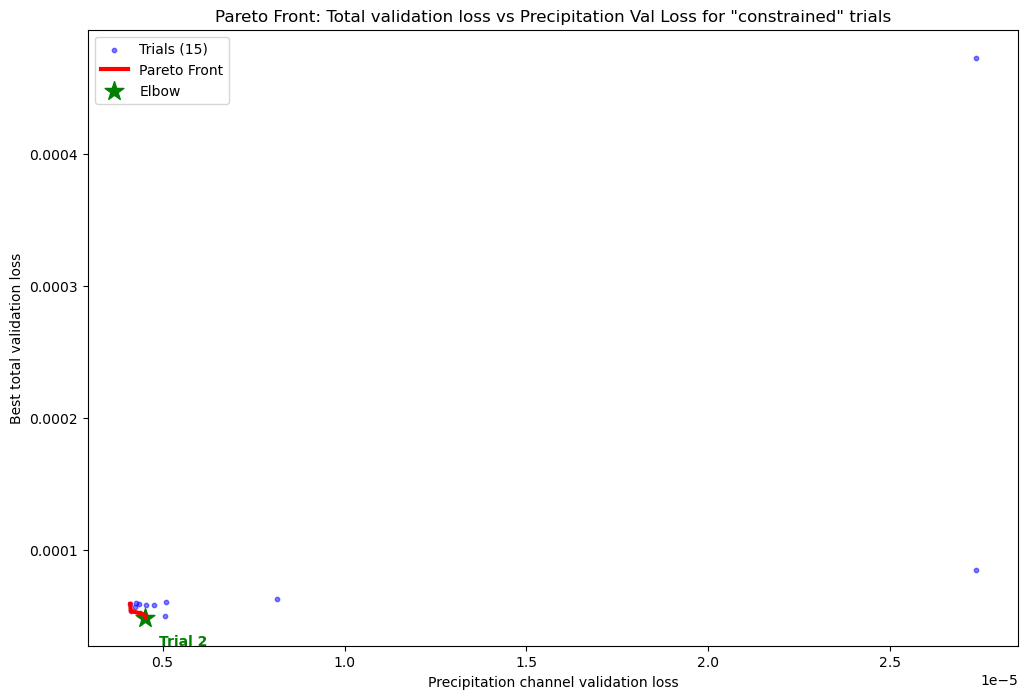

In [21]:
x = trials_data['RhiresD/val'].values
y = trials_data['best_val_loss'].values

def pareto_front_2d(x, y):
    points = np.array(list(zip(x, y)))
    pareto_idx = []
    for i, p in enumerate(points):
        if not np.any((points[:,0] < p[0]) & (points[:,1] < p[1])):
            pareto_idx.append(i)
    pareto_points = points[pareto_idx]
    pareto_idx = np.array(pareto_idx)
    # Sort for plotting
    sort_idx = np.argsort(pareto_points[:,0])
    pareto_points = pareto_points[sort_idx]
    pareto_idx = pareto_idx[sort_idx]
    return pareto_points, pareto_idx

pareto_points, pareto_idx = pareto_front_2d(x, y)

plt.figure(figsize=(12, 8))
plt.scatter(x, y, label='Trials (15)', color='blue', alpha=0.5, s=10)
plt.plot(pareto_points[:,0], pareto_points[:,1], color='red', linewidth=3, label='Pareto Front')

# Find Pareto point closest to origin
pareto_distances = np.sqrt(pareto_points[:,0]**2 + pareto_points[:,1]**2)
elbow_idx = np.argmin(pareto_distances)
elbow_x, elbow_y = pareto_points[elbow_idx]
elbow_trial_idx = pareto_idx[elbow_idx]
elbow_trial_num = trials_data.loc[elbow_trial_idx, 'trial']

plt.scatter(elbow_x, elbow_y, marker='*', s=200, color='green', label='Elbow')
plt.annotate(f'Trial {elbow_trial_num}', (elbow_x, elbow_y),
             textcoords="offset points", xytext=(10,-20), ha='left', color='green', fontsize=10, fontweight='bold')

plt.xlabel('Precipitation channel validation loss')
plt.ylabel('Best total validation loss')
plt.title('Pareto Front: Total validation loss vs Precipitation Val Loss for "constrained" trials')
plt.legend()
plt.grid(False)